# ДЗ №8 Multiclass classification

* Решите задачу мультиклассовой классификации. Датасет можно получить таким образом.
from sklearn import datasets
iris = datasets.load_iris()
* Воспользуйтесь всем, чему вы уже научились за прошлые занятие.
* Для начала постройте базовую модель (baseline) с помощью Логистической регрессии.
* Попробуйте SVM с различными гипер-параметрами (gamma, C, kernel).
* Сравните результаты работы моделей. Какая работает лучше?

Вопросы:
* Какие подходы позволяют логистической регрессии работать на нескольких классах?
* Какие значения gamma, C, kernel были наилучшими?

Результат - это ваш блокнот с исследованиями. И ответы на вопросы.

Опционально:
* Посчитать AUC для этой задачи. Почему это работает? А визуализировать получится?
* Используйте GridSearch и кросс-валидацию для подбора гипер-параметров

# Import section

In [1]:
# Base library
import numpy as np                                        # Linear algebra
import pandas as pd                                       # Data processing

# Visualization library
import matplotlib.pyplot as plt                           # Plotting library 
import seaborn as sns                                     # Data visualization
    
# Displays output inline
%matplotlib inline    

In [2]:
# Machine learning library
from sklearn.linear_model import LogisticRegression       # Class implements regularized logistic regression
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split      # Split arrays
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

# Data section

<h3 align='center'>The Iris flower.</h3>
<img src='iris.jpg'  width=800 height=640 ></img>

Iris plants dataset - Attribute Information:

The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician, eugenicist, and biologist Ronald Fisher in his 1936 paper.

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm       / Длина наружной доли чашелистника
        - sepal width in cm        / Ширина наружной доли чашелистника
        - petal length in cm       / Длина внутренней доли лепестка
        - petal width in cm        / Ширина внутренней доли лепестка
        - class:
                - Iris-Setosa      / Ирис щетинистый
                - Iris-Versicolour / Ирис разноцветный
                - Iris-Virginica   / Ирис виргинский 

References:

   - Fisher, R.A. "The use of multiple measurements in taxonomic problems"
     Annual Eugenics, 7, Part II, 179-188 (1936); also in "Contributions to
     Mathematical Statistics" (John Wiley, NY, 1950).
     
Details: 

https://en.wikipedia.org/wiki/Iris_flower_data_set

## Load the data

In [3]:
# load dataset from seaborn as a DataFrame called iris.
iris = sns.load_dataset('iris')

## Exploratory data analysis and visualization

In [4]:
# Preview the data
# Title DataFrame iris (return the first `n` rows) 
iris.head(n=3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [5]:
# Tail DataFrame iris (return the last `n` rows)
iris.tail(n=3)

,sepal_length,sepal_width,petal_length,petal_width,species
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [6]:
# Print a concise summary of a DataFrame.
print(iris.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [7]:
# Column names
print(f"Column names: \n{iris.columns}")

Column names: 
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [8]:
# Data dimensionality
print(f"Shape: \n{iris.shape}")

Shape: 
(150, 5)


In [9]:
# Data types for each attribute
print(f"Data types: \n{iris.dtypes}")

Data types: 
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


In [10]:
# Generate descriptive statistics.
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
# Detect missing values.
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [12]:
# Рассмотрим целевую/target переменную - 'species'.

# Для проверки численности/балансировки классов используем функции:
#    value_counts() - для числового представления, 
#    countplot()    - для графического представления.

In [13]:
# Сounts of unique rows in the DataFrame.
print(iris['species'].value_counts())

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64


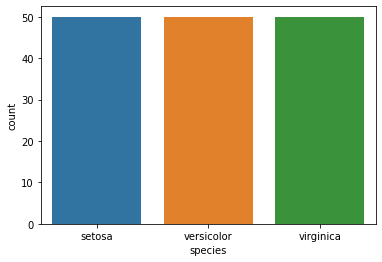

In [14]:
# Counts of observations in each categorical bin using bars.
sns.countplot(data=iris, x='species');

In [15]:
# Целевая переменная - 'species' содержит три класса: setosa, versicolor, virginica. 
# 50 значений в каждом классе, и являются полностью сбалансированными.

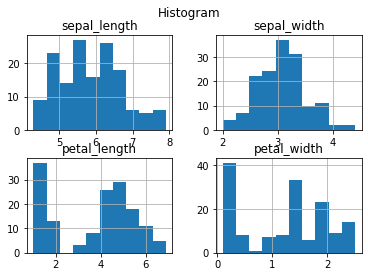

In [16]:
# Dataframe visualization
# Построим дополнительно -histogram, -boxplot, -pairplot для лучшего понимания структуры данных (как между собой разделяются классы). 
 
# Plot histogram
iris.hist()
plt.suptitle("Histogram");

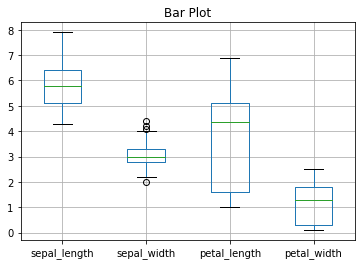

In [17]:
# Plot boxplot
iris.boxplot()
plt.title("Bar Plot");

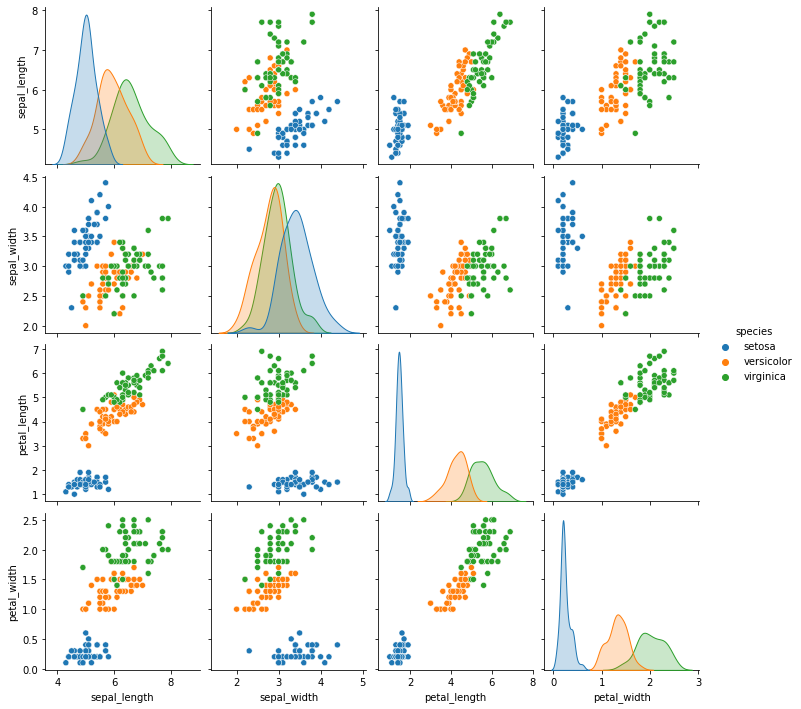

In [18]:
# Plot pairwise relationships in a dataset.
sns.pairplot(iris,hue='species');

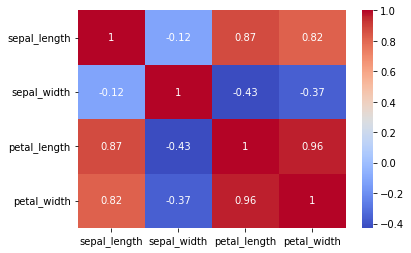

In [19]:
# Построим матрицу корреляцию между признаками
sns.heatmap(iris.corr(),annot=True, cmap="coolwarm");

Findings from Exploratory data analysis and visualization (EDA)


* Пропущенных значении - 0
* Общее количество столбцов - 5
* Kоличество сэмплов/строк - 150
* Все признаки - являются числовыми значениями
* Количество признаков/features - 4
* Целевая переменная - 'species' содержит три класса: setosa, versicolor, virginica. 50 значений в каждом классе, и являются полностью сбалансированными.


* Чашелистики длиннее и шире лепестков. 
* Длина чашелистика 4.3-7.9cм (среднее 5.84см). Ширина чашелистика 2.0-4.4см (среднее 3.05см).
* Длина лепестка 1.0-6.9см (среднее 3.75см). Ширина лепестка варьирует от  0.1-2.5см (среднее 1.19см).
* Средняя длина лепестка у setosa намного меньше, чем у versicolor и virginica.
* Средняя ширина чашелистика у setosa выше, чем у versicolor и virginica.
* Длина и ширина лепестка сильно коррелируют, в 96% случаев ширина увеличивается с увеличением длины. 
* Длина лепестка отрицательно коррелирует с шириной чашелистика, в 43% случаев увеличение ширины чашелистика приводит к уменьшению длины лепестка.
* Основываясь только на длине и ширине чашелистика/лепестка, можно сделать вывод, что versicolor/virginica могут быть похожи по размеру, однако характеристики setosa заметно отличаются от двух других.

## Test Split and Scaling

Note: Разделим данные на тестовые и обучающие с разным значением параметра train_test_split->stratify

      Step 1. train_test_split->stratify=None - без учета распределения классов
      Step 2. train_test_split->stratify=y    - с учетом распределения классов

In [20]:
test_size=0.3
random_state=42

In [21]:
#Step 1. stratify=None

# inputs / Массив X, содержит признаки для обучения
X = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

# outputs / Массив у с целевой переменной
y = iris['species']

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state, shuffle=True, stratify=None)

In [22]:
# Data dimensionality and class distribution on train set
print(f"Shape X_train: \n{X_train.shape}\n")
print(f"Class distribution y_train: \n{y_train.value_counts()}")

Shape X_train: 
(105, 4)

Class distribution y_train: 
versicolor    37
virginica     37
setosa        31
Name: species, dtype: int64


In [23]:
# Data dimensionality and class distribution on test set
print(f"Shape X_test: \n{X_test.shape}\n")
print(f"Class distribution y_test: \n{y_test.value_counts()}")

Shape X_test: 
(45, 4)

Class distribution y_test: 
setosa        19
versicolor    13
virginica     13
Name: species, dtype: int64


In [24]:
#Step 2. stratify=y

# inputs / Массив X, содержит признаки для обучения
X = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

# outputs / Массив у с целевой переменной
y = iris['species']

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state, shuffle=True, stratify=y)

In [25]:
# Data dimensionality and class distribution on train set
print(f"Shape X_train: \n{X_train.shape}\n")
print(f"Class distribution y_train: \n{y_train.value_counts()}")

Shape X_train: 
(105, 4)

Class distribution y_train: 
versicolor    35
setosa        35
virginica     35
Name: species, dtype: int64


In [26]:
# Data dimensionality and class distribution on test set
print(f"Shape X_test: \n{X_test.shape}\n")
print(f"Class distribution y_test: \n{y_test.value_counts()}")

Shape X_test: 
(45, 4)

Class distribution y_test: 
virginica     15
versicolor    15
setosa        15
Name: species, dtype: int64


In [27]:
folds = 10

# Returns stratified folds
skf = StratifiedKFold(n_splits=folds, random_state=random_state, shuffle=True)

# Returns K-Folds cross-validator
kf = KFold(n_splits=folds, random_state=random_state, shuffle=True)

Note: С параметром stratify=y получаем, относительно тестового и тренировочного набора, одинаково сбалансированные данные по классам. stratify - важный параметр для несбалансированных классов.  

In [28]:
# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# Multi-Class Logistic Regression Model

## Base Multi-Class Logistic Regression Model

In [29]:
# Построим базовую модель LogisticRegression()

# Instantiate a classifier and print default parameters
base_log_model = LogisticRegression()
print(f"Default parameters: \n{base_log_model.get_params()}")

Default parameters: 
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [30]:
# Train classifer
base_log_model.fit(scaled_X_train,y_train)

LogisticRegression()

## Model Performance on Base Multi-Class Logistic Regression Model

In [31]:
# Predict class labels for samples in X
base_log_y_pred = base_log_model.predict(X = scaled_X_test)

In [32]:
# Accuracy classification score
accuracy_score(y_test, base_log_y_pred)

0.9111111111111111

In [33]:
# Build confusion matrix in text mode
confusion_matrix(y_test, base_log_y_pred)

array([[15,  0,  0],
       [ 0, 14,  1],
       [ 0,  3, 12]], dtype=int64)

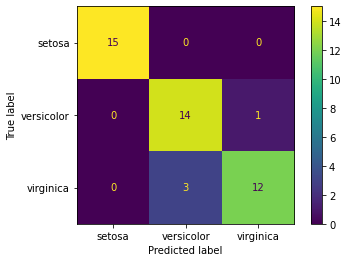

In [34]:
# Build confusion matrix in graphic mode
plot_confusion_matrix(base_log_model, scaled_X_test, y_test);

In [35]:
print(classification_report(y_test, base_log_y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.82      0.93      0.87        15
   virginica       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45



## GridSearch for Multi-Class Logistic Regression Model

In [36]:
# Create a list of dictionaries called param_grid and fill out some parameters for C, solver, penalty, multi_class.
# Для каждого solver свой набор параметров (не все solver поддерживают одни и те же параметры)

C = [0.001, 0.01, 0.1, 1, 10, 100]
param_grid = [{'solver':['lbfgs'],     'C':C, 'penalty':['l2'],       'multi_class':['ovr', 'multinomial']},
              {'solver':['saga'],      'C':C, 'penalty':['l1', 'l2'], 'multi_class':['ovr', 'multinomial']},
              {'solver':['liblinear'], 'C':C, 'penalty':['l1', 'l2'], 'multi_class':['ovr']}]

In [37]:
grid_log_model = GridSearchCV(estimator=LogisticRegression(),
                              param_grid=param_grid,
                              refit=True,
                              verbose=1,
                              cv=kf,
                              scoring='accuracy',
                              n_jobs=-1)

# scoring='accuracy' -> Strategy to evaluate the performance of the cross-validated model on the test set.
# n_jobs=-1          -> Number of jobs to run in parallel.

In [38]:
grid_log_model.fit(scaled_X_train,y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'multi_class': ['ovr', 'multinomial'],
                          'penalty': ['l2'], 'solver': ['lbfgs']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'multi_class': ['ovr', 'multinomial'],
                          'penalty': ['l1', 'l2'], 'solver': ['saga']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'multi_class': ['ovr'], 'penalty': ['l1', 'l2'],
                          'solver': ['liblinear']}],
             scoring='accuracy', verbose=1)

## Model Performance on GridSearch Multi-Class Logistic Regression Model

In [39]:
# Predict class labels for samples in X
grid_log_y_pred = grid_log_model.predict(X = scaled_X_test)

In [40]:
# Accuracy classification score
accuracy_score(y_test, grid_log_y_pred)

0.9111111111111111

In [41]:
print(f"Best parameter values: \n{grid_log_model.best_params_}")

Best parameter values: 
{'C': 10, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'lbfgs'}


In [42]:
print(f"Best model:  \n{grid_log_model.best_estimator_}")

Best model:  
LogisticRegression(C=10, multi_class='ovr')


In [43]:
# Build confusion matrix in text mode
confusion_matrix(y_test, grid_log_y_pred)

array([[15,  0,  0],
       [ 0, 14,  1],
       [ 0,  3, 12]], dtype=int64)

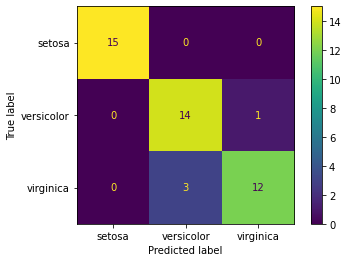

In [44]:
# Build confusion matrix in graphic mode
plot_confusion_matrix(grid_log_model, scaled_X_test, y_test);

In [45]:
print(classification_report(y_test, grid_log_y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.82      0.93      0.87        15
   virginica       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45



## Plot ROC curves for the multiclass problem and AUC

Note: Для задачи мульти-классовой классификаций нельзя применить функцию sklearn.metrics.plot_roc_curve, поскольку она предназначена для задачи бинарной классификации (одного класса). Воспользуемся программным кодом приведенном  в документации к sklearn.  На одном плане выведем roc_curve и auc для каждого класса.

Source: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

In [46]:
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(5,5)):
    y_score = clf.decision_function(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

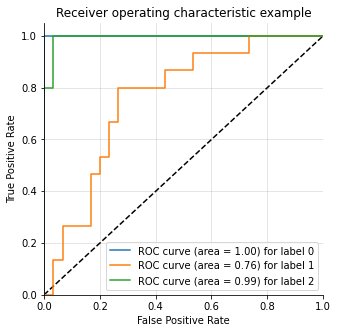

In [47]:
# Compute macro-average ROC curve and ROC area
plot_multiclass_roc(grid_log_model, scaled_X_test, y_test, n_classes=3)

# Support Vector Machines (SVC) Model

<h3 align='left'>Support Vector Machines - Separates data between two classes by maximizing the margin between the hyperplane and the nearest data points of any class. Relies on the following:</h3>
<img src='svc.jpg'  width=640 height=480 ></img>

## Base SVC Model

In [48]:
# Построим базовую модель SVC()

# Instantiate a classifier and print default parameters
base_svc_model = SVC()
base_svc_model.fit(scaled_X_train,y_train)
print(f"Default parameters: \n{base_svc_model.get_params()}")

Default parameters: 
{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [49]:
# Train classifer
base_svc_model.fit(scaled_X_train,y_train)

SVC()

## Model Performance on Base SVC Model

In [50]:
# Predict class labels for samples in X
base_SVC_y_pred = base_svc_model.predict(X = scaled_X_test)

In [51]:
# Accuracy classification score
accuracy_score(y_test, base_SVC_y_pred)

0.9333333333333333

In [52]:
# Build confusion matrix in text mode
confusion_matrix(y_test, base_SVC_y_pred)

array([[15,  0,  0],
       [ 0, 14,  1],
       [ 0,  2, 13]], dtype=int64)

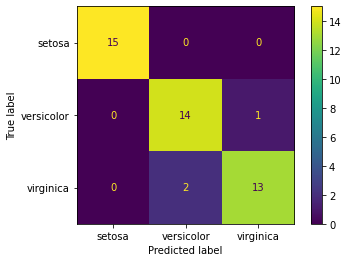

In [53]:
# Build confusion matrix in graphic mode
plot_confusion_matrix(base_svc_model, scaled_X_test, y_test);

In [54]:
print(classification_report(y_test, base_SVC_y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      0.93      0.90        15
   virginica       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



## GridSearch for SVC Model

In [55]:
# Create a dictionary called param_grid and fill out some parameters for C, gamma, kernel.
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
C = [0.001, 0.01, 0.1, 1, 10, 100]
gamma = [0.001, 0.01, 0.1, 1, 10, 100]

param_grid = {'kernel':kernel, 'C':C, 'gamma':gamma}

In [56]:
# Create a GridSearchCV object and fit it to the training data.
grid_svc_model = GridSearchCV(estimator=SVC(),
                              param_grid=param_grid,
                              refit=True,
                              verbose=1,
                              cv=skf,
                              scoring='accuracy',
                              n_jobs=-1)

# scoring='accuracy' -> Strategy to evaluate the performance of the cross-validated model on the test set.
# n_jobs=-1 -> Number of jobs to run in parallel.

In [57]:
grid_svc_model.fit(scaled_X_train,y_train)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy', verbose=1)

## Model Performance on GridSearch SVC Model

In [58]:
# Predict class labels for samples in X
grid_SVC_y_pred = grid_svc_model.predict(X = scaled_X_test)

In [59]:
# Accuracy classification score
accuracy_score(y_test, grid_SVC_y_pred)

0.9333333333333333

In [60]:
print(f"Best parameter values: \n{grid_svc_model.best_params_}")

Best parameter values: 
{'C': 100, 'gamma': 0.001, 'kernel': 'linear'}


In [61]:
print(f"Best model:  \n{grid_svc_model.best_estimator_}")

Best model:  
SVC(C=100, gamma=0.001, kernel='linear')


In [62]:
# Build confusion matrix in text mode
confusion_matrix(y_test, grid_SVC_y_pred)

array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  3, 12]], dtype=int64)

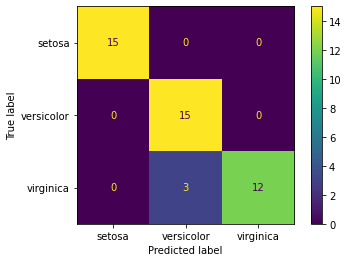

In [63]:
# Build confusion matrix in graphic mode
plot_confusion_matrix(grid_svc_model, scaled_X_test, y_test);

In [64]:
print(classification_report(y_test, grid_SVC_y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.83      1.00      0.91        15
   virginica       1.00      0.80      0.89        15

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



## Plot ROC curves for the multiclass problem and AUC

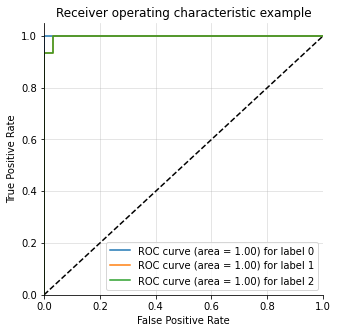

In [65]:
# Compute macro-average ROC curve and ROC area
plot_multiclass_roc(grid_svc_model, scaled_X_test, y_test, n_classes=3)

# Questions:

1 Какие подходы позволяют логистической регрессии работать на нескольких классах?


Есть два основных подхода которые реализованы в sklearn: 

1. "Один против всех" ('ovr'): в общем случае для каждого класса строится бинарная модель, которая пытаестя отделить этот класс от всех остальных. Количество внутенних моделей равно количеству классов. 


2. "softmax regression" ('multinomial'): в основе модели лежит функция softmax, модель принимает на вход вектор признаков одного экземпляра, и выдает вектор вероятностей (по количеству классов) принадлежности экземпляра к классам.

2 Какие значения gamma, C, kernel были наилучшими?


In [66]:
# Для логистической регрессий:
print(f"Best parameter values: \n{grid_log_model.best_params_}")

Best parameter values: 
{'C': 10, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'lbfgs'}


In [67]:
# Для SVC:
print(f"Best parameter values: \n{grid_svc_model.best_params_}")

Best parameter values: 
{'C': 100, 'gamma': 0.001, 'kernel': 'linear'}


# Summary:

В данной работе использовали модели LogisticRegression и SVC для задачи мультиклассовой классификации (dataset iris). Также применили Gridsearch для настройки параметров модели. На данной наборе данных не получилось улучшить оценку модели за счет подбора параметров, но на других наборах это должно дать значительное улучшение модели.

In [68]:
# Результаты accuracy для построенных моделей:

print(f"Accuracy Base Log Model: \n{accuracy_score(y_test, base_log_y_pred)}")
print(f"Accuracy Grid Log Model: \n{accuracy_score(y_test, grid_log_y_pred)}")
print(f"Accuracy Base SVC Model: \n{accuracy_score(y_test, base_SVC_y_pred)}")
print(f"Accuracy Grid SVC Model: \n{accuracy_score(y_test, grid_SVC_y_pred)}")

Accuracy Base Log Model: 
0.9111111111111111
Accuracy Grid Log Model: 
0.9111111111111111
Accuracy Base SVC Model: 
0.9333333333333333
Accuracy Grid SVC Model: 
0.9333333333333333


Лучшие результаты получаются при использовании модели SVM (особенно метрика AUC)

Note: При изменений значении random_state, test_size в train_test_split очень сильно меняются значения точности полученных моделей от 0.80 (увеличение test size до 30%) до 0.98 (уменьшение test size до 10%), как на base так и grid моделях. Для test_size это еще объяснимо (модель получает больше данных для обучения и точность выше). С random_state accuracy при постоянном test_size, может как увеличиваться так и уменьшаться, особенно сильно влияние на auc в Log Model.